# Project 2 - Classification
## Predict customers likely to respond to a marketing campaign
### This notebook uses the *campaign.xlsx* dataset

(c) Nuno António 2022 - Rev. 1.0

## Dataset description

- **AcceptedCmp1** - 1 if customer accepted the offer in the 1st campaign, 0 otherwise 
- **AcceptedCmp2** - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise 
- **AcceptedCmp3** - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise 
- **AcceptedCmp4** - 1 if customer accepted the offer in the 4th campaign, 0 otherwise 
- **AcceptedCmp5** - 1 if customer accepted the offer in the 5th campaign, 0 otherwise 
- **Response (target)** - 1 if customer accepted the offer in the last campaign, 0 otherwise 
- **Complain** - 1 if customer complained in the last 2 years
- **DtCustomer** - date of customer’s enrolment with the company
- **Education** - customer’s level of education
- **Marital** - customer’s marital status
- **Kidhome** - number of small children in customer’s household
- **Teenhome** - number of teenagers in customer’s household
- **Income** - customer’s yearly household income
- **MntFishProducts** - amount spent on fish products in the last 2 years
- **MntMeatProducts** - amount spent on meat products in the last 2 years
- **MntFruits** - amount spent on fruits products in the last 2 years
- **MntSweetProducts** - amount spent on sweet products in the last 2 years
- **MntWines** - amount spent on wine products in the last 2 years
- **MntGoldProds** - amount spent on gold products in the last 2 years
- **NumDealsPurchases** - number of purchases made with discount
- **NumCatalogPurchases** - number of purchases made using catalogue
- **NumStorePurchases** - number of purchases made directly in stores
- **NumWebPurchases** - number of purchases made through company’s web site
- **NumWebVisitsMonth** - number of visits to company’s web site in the last month
- **Recency** - number of days since the last purchase

[Link to the original dataset](https://github.com/ifood/ifood-data-business-analyst-test)  
[A complete solution](https://github.com/mgermy/project_model_cluster)  
[A smaller one](https://github.com/nailson/ifood-data-business-analyst-test)  
[Here you can find the discussion on kaggle](https://www.kaggle.com/datasets/jackdaoud/marketing-data?select=ifood_df.csv)

We can notice that we can build a monetary feature summing all the features related to monetary, and we can also built a frequency feature summing all the purchases features and then dividing by the dt_customer.  
Maybe can make sense after this engineering is done to make some percentage features, like the percentage spent in one category compared to the total and also the pecentage of purchases done compared to the total.

## Work description

### Overview
<p>You should organize into groups of 3 to 5 students, where you will assume the role of a consultant. You are asked to develop a prediction model in such a way that it will be possible for the Marketing Department of a retail company to predict which customers are likely to respond to a marketing campaing based on information from a previous campaign.</p>
<p>A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses.</p>

### Questions or additional informations
For any additional questions, don't hesitate to get in touch with the instructors. The instructors will also act as the company business/project stakeholder.

## Initializations and data loading

In [241]:
# Installing the necessary packages:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #visualizations


In [242]:
# Modelling packages
import category_encoders as ce
import collections
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from yellowbrick.model_selection import LearningCurve

In [243]:
# Formating that will be applied in all of the notebook
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 15
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 12
heatmaps_text_fontSize = 12

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

# increase the number of columns to display
pd.set_option('display.max_columns', 500)

In [244]:
# Loading the dataset: 
ds = pd.read_parquet('oneHotEncoded.parquet.snappy')
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,1967.0,52109.792069,21157.456610,2447.0,35661.500000,51766.000000,68557.000000,160803.0
Recency,1967.0,48.945602,28.957973,0.0,24.000000,49.000000,74.000000,99.0
MntWines,1967.0,308.585663,338.802944,0.0,24.000000,180.000000,508.500000,1493.0
MntFruits,1967.0,26.646670,40.010003,0.0,2.000000,8.000000,33.000000,199.0
MntMeatProducts,1967.0,169.904423,228.430574,0.0,16.000000,69.000000,232.500000,1725.0
MntFishProducts,1967.0,37.863752,55.052465,0.0,3.000000,12.000000,50.000000,259.0
MntSweetProducts,1967.0,27.434164,41.603865,0.0,1.000000,8.000000,34.000000,262.0
MntGoldProds,1967.0,44.144382,51.669882,0.0,9.000000,25.000000,57.000000,321.0
NumDealsPurchases,1967.0,2.324860,1.880377,0.0,1.000000,2.000000,3.000000,15.0
NumWebPurchases,1967.0,4.132181,2.752751,0.0,2.000000,4.000000,6.000000,27.0


### Decision Tree

#### - Data preparation:

In [245]:
# Create a modeling dataset from the original dataset
X = ds.copy(deep=True)

In [246]:
X.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Lifetime,AvgTimeBetweenTransaction,AvgWebPurchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Kidhome_0,Kidhome_1,Teenhome_0,Teenhome_1
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,58138,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,663.0,30.136364,1.142857,0,0,1,0,0,0,0,1,0,0,1,0,1,0
1,46344,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,113.0,28.250000,0.200000,0,0,1,0,0,0,0,1,0,0,0,1,0,1
2,71613,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,312.0,15.600000,2.000000,0,0,1,0,0,0,0,0,1,0,1,0,1,0
3,26646,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,139.0,23.166667,0.333333,0,0,1,0,0,0,0,0,1,0,0,1,1,0
4,58293,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,161.0,11.500000,1.000000,0,0,0,0,1,0,1,0,0,0,0,1,1,0


#### - Modeling:

In [247]:
# Create the Target
y = X['Response']

In [248]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

In [249]:
toDrop = ['Response', 'AvgWebPurchases']

In [250]:
# Remove the Target from the training
X_train = X_train.drop(toDrop,axis=1)
X_test = X_test.drop(toDrop,axis=1)

Counter({0: 1250, 1: 225})
0    0.847458
1    0.152542
Name: Response, dtype: float64


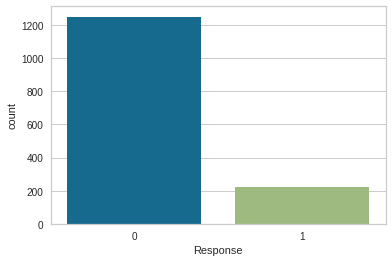

In [251]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train}), ax=ax)
print(y_train.value_counts(normalize=True))

Counter({0: 1250, 1: 937})


<AxesSubplot:xlabel='Response', ylabel='count'>

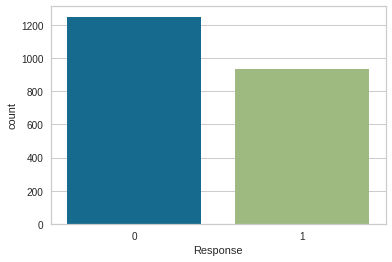

In [252]:
# Import package
from imblearn.over_sampling import SMOTE

# Applyting SMOTE to generare new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=0.75)
X_train2, y_train2 = sm.fit_resample(X_train, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train2}), ax=ax)

We tried to use for the hyper tuning oversampled data and the original data but these is not a difference.  
We started, using the gridsearch but tuning after tunig we decided manually the parameters. So the grid was usefull in order to guide us on the decision of which parameter is the best.

In [253]:
parameter_space = {
    'max_depth': [3],
    'min_samples_leaf': [350],
    'random_state': [123]
}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameter_space, n_jobs=-1, cv=5, scoring='roc_auc')
clf.fit(X_train2, y_train2) # X is train samples and y is the corresponding labels

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3], 'min_samples_leaf': [350],
                         'random_state': [123]},
             scoring='roc_auc')

In [254]:
clf.best_params_

{'max_depth': 3, 'min_samples_leaf': 350, 'random_state': 123}

In [255]:
# Create the model
estimator = tree.DecisionTreeClassifier(**clf.best_params_)

In [256]:
# Create object and train the model
estimator.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=350, random_state=123)

#### - Evaluation:

In [257]:
# predict y for X_train and X_test
y_pred_train = estimator.predict(X_train2) 
y_pred_test = estimator.predict(X_test) 

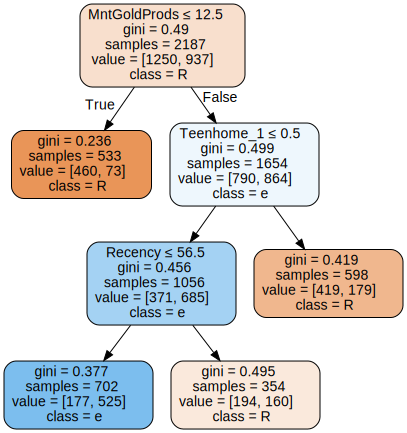

In [258]:
# Plot the tree
# Install Graphviz using "pip install graphviz" or "conda install python-graphviz"
import graphviz
dot_data = tree.export_graphviz(estimator, out_file=None, 
                      feature_names=list(X_train.columns),  
                      class_names='Response',  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [259]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [260]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

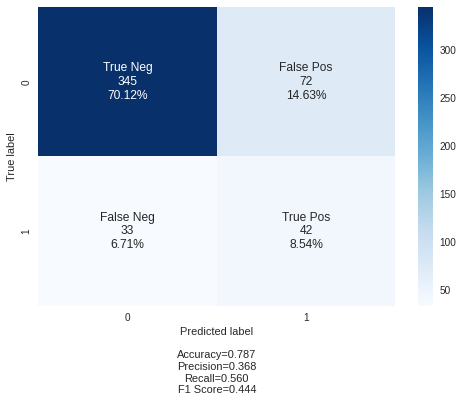

In [261]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [262]:
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.730681,0.786585
1,PRECISION,0.747863,0.368421
2,RECALL,0.560299,0.560000
3,F1 SCORE,0.640635,0.444444
4,AUC,0.709349,0.693669


/home/tosk/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/tosk/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/tosk/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


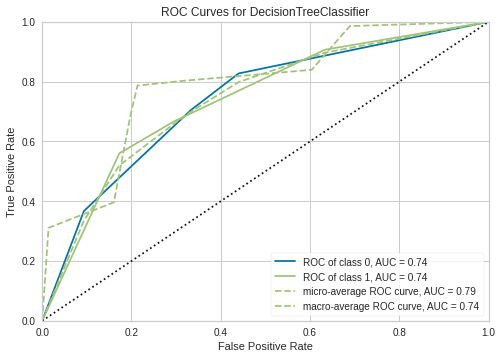

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [263]:
# ROC curve
visualizer = ROCAUC(estimator, classes=['0','1'])
visualizer.fit(X_train2, y_train)
visualizer.score(X_test.values, y_test)
visualizer.show()

/home/tosk/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/tosk/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/tosk/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/tosk/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/tosk/anaconda3/lib/python3.9/site-packages/sklearn/metri

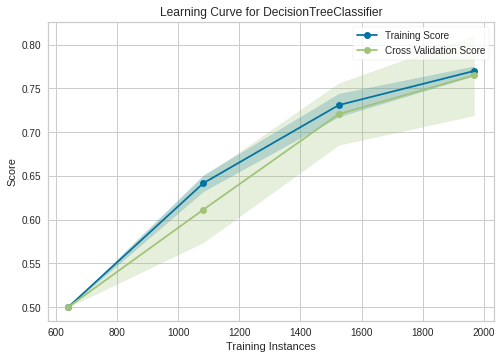

<AxesSubplot:title={'center':'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [264]:
# Plot the learning curve
cv = 10
visualizer = LearningCurve(estimator=estimator, cv=cv, scoring='roc_auc', n_jobs=-1, random_state=123)
visualizer.fit(X_train2, y_train2)
visualizer.show()